In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
df=pd.read_csv('../input/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Two-way frequency tables, also called contingency tables, are tables of counts with two dimensions where each dimension is a different variable. Two-way tables can give you insight into the relationship between two variables. To create a two way table, pass two variables to the pd.crosstab() function instead of one:

In [4]:
#Number of survived male and female with Pclass
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Pclass"],
                             margins=True)   

In [5]:
survived_class

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [6]:
survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class


,class1,class2,class3,rowtotal
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [7]:
survived_class.index= ["died","survived","columntotal"]

survived_class

,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
columntotal,216,184,491,891


Notice that by passing a second variable to the columns argument, the resulting table has columns categorized by both Pclass and Sex. The outermost index (Pclass) returns sections of the table instead of individual columns:

In [8]:
surv_sex_class = pd.crosstab(index=df["Survived"], 
                             columns=[df["Pclass"],
                                      df["Sex"]],
                             margins=True)
surv_sex_class

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [9]:
surv_sex_class.index= ["died","survived","columntotal"]
surv_sex_class

Pclass           1           2           3       All
Sex         female male female male female male     
died             3   77      6   91     72  300  549
survived        91   45     70   17     72   47  342
columntotal     94  122     76  108    144  347  891

In [10]:
#Number of survived male and female with Probabilities
survived_sex_class_norm = pd.crosstab(index=df["Survived"], 
                            columns=df["Sex"],
                           normalize=True,  margins=True) 
survived_sex_class_norm

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


Now we can draw primary conclusions, based on the training data file:

*  0.62% of the people in the training data were men(549), 38% were women(342)
*  Out of all men, around 80% died 
*  Out of all women, fewer than 26% died
*  Out of all people, 62% died and 38% survived (the “All” column)

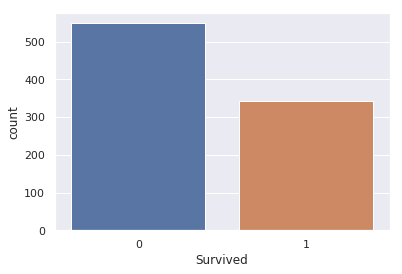

In [11]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Survived", data=df)

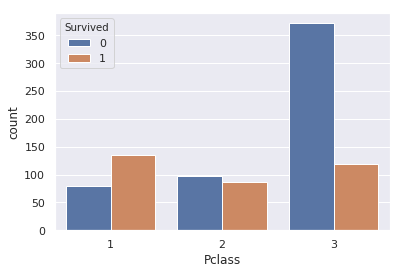

In [12]:
ax = sns.countplot(x="Pclass", hue="Survived", data=df)

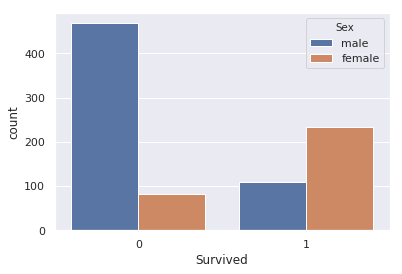

In [13]:

g = sns.countplot(x="Survived",hue="Sex" ,data=df)

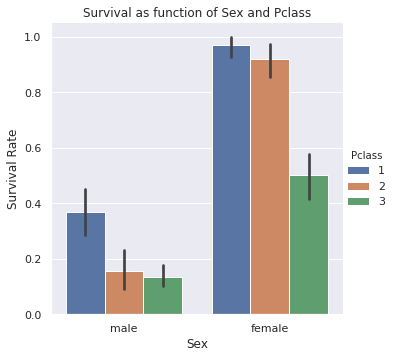

In [14]:
import matplotlib.pyplot as plt
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=df, kind='bar')
plt.ylabel("Survival Rate")
plt.title("Survival as function of Sex and Pclass")
plt.show()

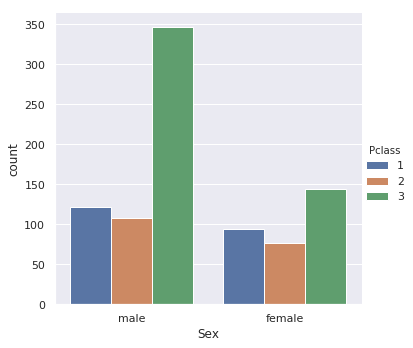

In [15]:
sns.catplot(x="Sex",hue='Pclass' ,kind="count", data=df)

In [16]:
survived_sib_class = pd.crosstab(df["SibSp"], 
                            df["Parch"], margins=True) 
survived_sib_class

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537,38,29,1,1,2,0,608
1,123,57,19,3,3,3,1,209
2,16,7,4,1,0,0,0,28
3,2,7,7,0,0,0,0,16
4,0,9,9,0,0,0,0,18
5,0,0,5,0,0,0,0,5
8,0,0,7,0,0,0,0,7
All,678,118,80,5,4,5,1,891


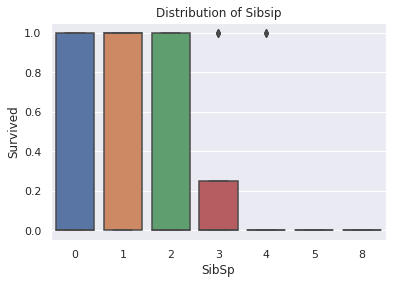

In [17]:

sns.boxplot('SibSp','Survived',data=df)
plt.title('Distribution of Sibsip')
plt.show()

From the above graph we can say that , parents with at least 4 children were unlikely to survive (only 1 out of 10 did).

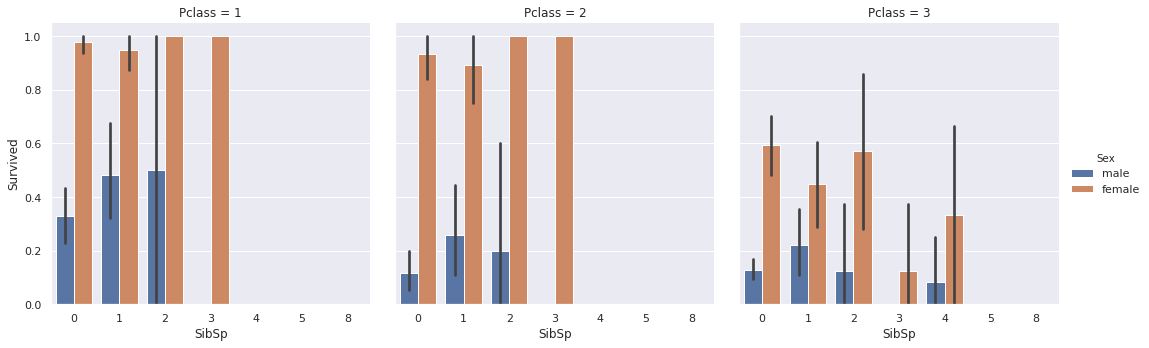

In [18]:
# Plot SibSp vs Survived per gender and Pclass using sns.catplot
sns.catplot(x="SibSp", y="Survived", hue="Sex",col="Pclass", data=df, kind='bar')

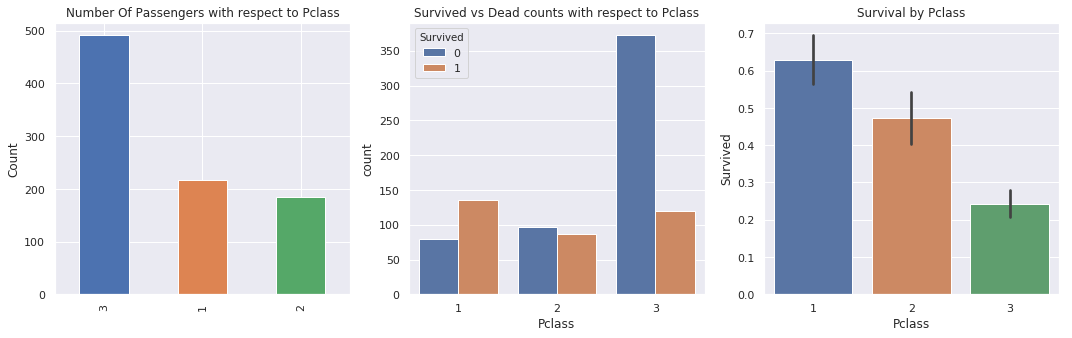

In [19]:
#features per Pclass
f,ax=plt.subplots(1,3,figsize=(18,5))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')
sns.barplot(x="Pclass", y="Survived", data=df,ax=ax[2])
ax[2].set_title('Survival by Pclass')
plt.show()

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

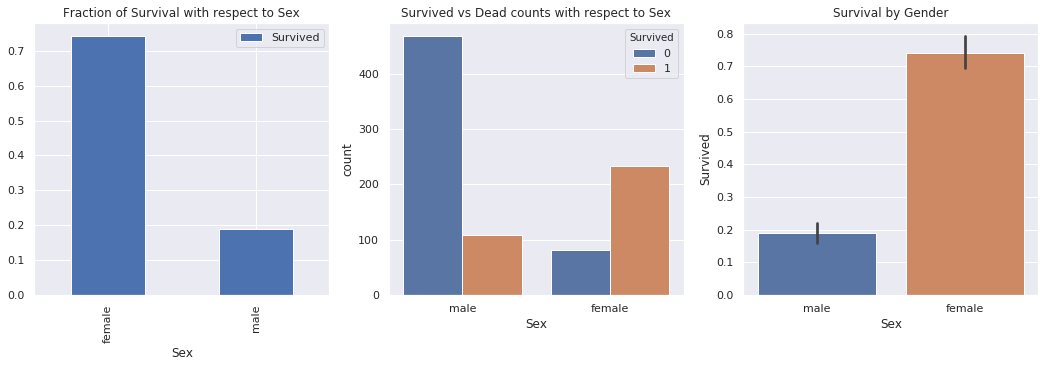

In [20]:
# feature per Gender
f,ax=plt.subplots(1,3,figsize=(18,5))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')
sns.barplot(x="Sex", y="Survived", data=df,ax=ax[2])
ax[2].set_title('Survival by Gender')
plt.show()

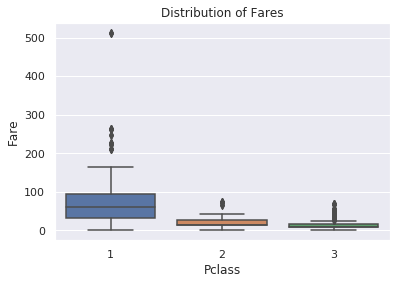

In [21]:
# drawing outlayers by grouping all values and amking max,min , mean and median value by making outlayer 
sns.boxplot('Pclass','Fare',data=df)
plt.title('Distribution of Fares')
plt.show()

This is not surprising that the outliers existed exclusively in the high socioeconomic class group, as only the wealthy individuals can afford the higher fare price.

This is clear that the upper class were able to afford more expensive fares, with highest fares above 500 dollars. To look at the survival rate, I break down the fare data into two groups